# 8. Hafta Lab-1: Evrişimli Derin Öğrenme - Convolutional Deep Learning
## BGM 565: Siber Güvenlik için Makine Öğrenme Yöntemleri
## İstanbul Şehir Üni. - Bilgi Güvenliği Müh.
### Dr. Ferhat Özgür Çatak

Bu lab çalışması kapsamında CNN ile el yazısı tanıma uygulaması yapılacaktır.

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from IPython.display import Image

Using TensorFlow backend.


#### *Mnist* veri kümesini kullan.
Veri kümesinde bulunan ilk 6 rakamı gösterelim.

11485184/11490434 [============================>.] - ETA: 0s

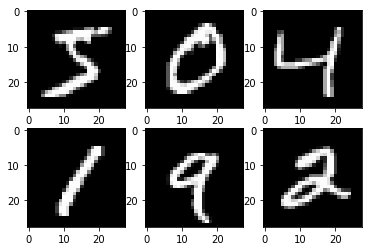

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(231)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(232)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(233)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(234)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.subplot(235)
plt.imshow(X_train[4], cmap=plt.get_cmap('gray'))
plt.subplot(236)
plt.imshow(X_train[5], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

#### *Keras* yükleyelim.

In [3]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.utils import plot_model

numpy.random.seed(15)

In [4]:
print("X_train.shape :",X_train.shape)
print("X_test.shape  :",X_test.shape)

('X_train.shape :', (60000, 28, 28))
('X_test.shape  :', (10000, 28, 28))


In [5]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

#### reshape : [samples][pixels][width][height]

In [6]:
print("X_train.shape :",X_train.shape)
print("X_test.shape  :",X_test.shape)

('X_train.shape :', (60000, 1, 28, 28))
('X_test.shape  :', (10000, 1, 28, 28))


#### Veri kümesini normalize et.

In [7]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

num_classes = y_test.shape[1]

print("Shape 1:",X_train.shape)
#X_train = X_train[0:10000,:]
print("Shape 2:",X_train.shape)

('Shape 1:', (60000, 28, 28, 1))
('Shape 2:', (60000, 28, 28, 1))


### CNN Modelini oluştur.

In [8]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                294976    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 296,458
Trainable params: 296,458
Non-trainable params: 0
_________________________________________________________________


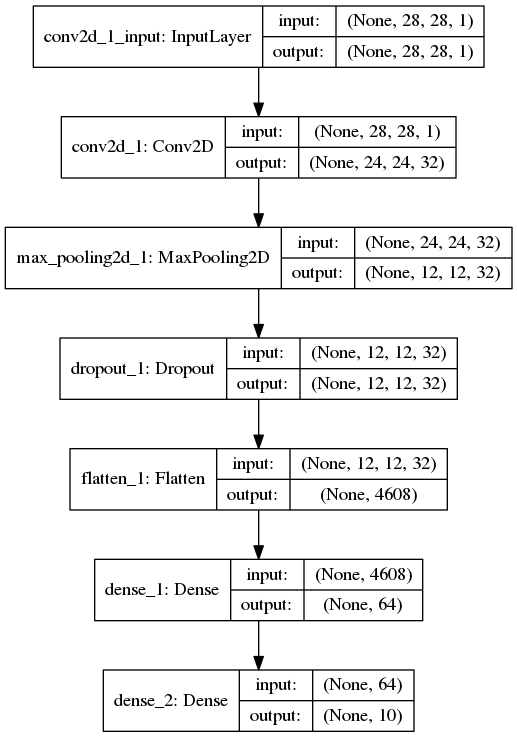

In [9]:
plot_model(model, show_shapes=True, to_file="cnn.png")
Image("cnn.png")

### Modeli eğitelim

In [10]:
history = model.fit(X_train, y_train, epochs=10, batch_size=1024, verbose=1,
                    validation_split=0.7)

Train on 18000 samples, validate on 42000 samples
Epoch 1/10
18000/18000 [==============================] - 22s - loss: 1.3839 - acc: 0.6297 - val_loss: 0.5485 - val_acc: 0.8457
Epoch 2/10
18000/18000 [==============================] - 20s - loss: 0.4337 - acc: 0.8702 - val_loss: 0.3287 - val_acc: 0.9040
Epoch 3/10
18000/18000 [==============================] - 21s - loss: 0.3060 - acc: 0.9091 - val_loss: 0.2646 - val_acc: 0.9239
Epoch 4/10
18000/18000 [==============================] - 21s - loss: 0.2438 - acc: 0.9292 - val_loss: 0.2189 - val_acc: 0.9373
Epoch 5/10
18000/18000 [==============================] - 20s - loss: 0.2020 - acc: 0.9415 - val_loss: 0.1850 - val_acc: 0.9470
Epoch 6/10
18000/18000 [==============================] - 21s - loss: 0.1676 - acc: 0.9533 - val_loss: 0.1618 - val_acc: 0.9532
Epoch 7/10
18000/18000 [==============================] - 20s - loss: 0.1427 - acc: 0.9584 - val_loss: 0.1414 - val_acc: 0.9595
Epoch 8/10
18000/18000 [==============================

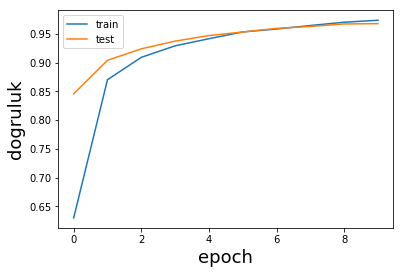

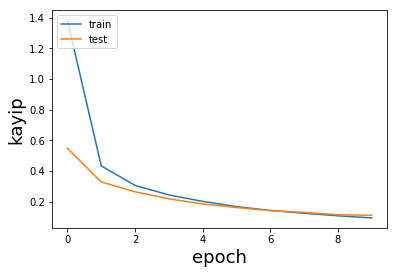

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('dogruluk', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.ylabel('kayip', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')

plt.show()